In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import datetime

In [2]:
# Import data
data = pd.read_csv('StockDataSet.csv', usecols=["Date", "Close"])
data.head()

,Date,Close
0,3/16/2018,178.02
1,3/15/2018,178.65
2,3/14/2018,178.44
3,3/13/2018,179.97
4,3/12/2018,181.72


In [3]:
#Date to epoch
for index,row in data.iterrows():
    data.loc[index,'Date'] = time.mktime(datetime.datetime.strptime(row['Date'], "%m/%d/%Y").timetuple())

Date = np.array(data.Date)
Price = np.array(data.Close)
Date.shape

(251,)

In [4]:
# converting the shape to n X 1
X = Date.reshape(Date.shape[0],1)
y = Price.reshape(Price.shape[0],1)
X.shape,y.shape

((251, 1), (251, 1))

In [5]:
#Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

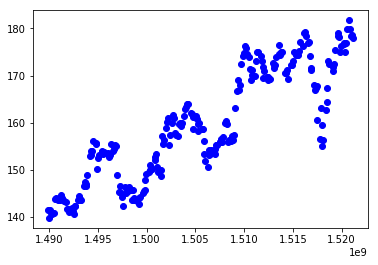

In [6]:
#Visualize the dataset
plt.scatter(X,y,color='blue')
plt.show()

In [7]:
#fit the data points to Liner Regression model
linear_model_ = linear_model.LinearRegression()
linear_model_.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
#coefficient of determination
print('R-squared score (training): {:.3f}'
     .format(linear_model_.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linear_model_.score(X_test, y_test)))

R-squared score (training): 0.785
R-squared score (test): 0.787


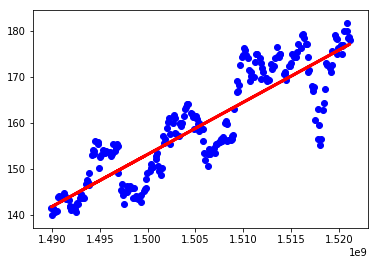

In [10]:
#Plotting the line made by the model
plt.plot(X_train,linear_model_.predict(X_train),color='red',linewidth=3)
plt.scatter(X,y,color='blue')
plt.show()

In [11]:
#Coefficient and Intercept of the line
print(linear_model_.coef_)
print(linear_model_.intercept_)

[[  1.13388800e-06]]
[-1547.73354399]


In [18]:
#A new input to predict
s = "31/03/2018"
temp_date = time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y").timetuple())

df = pd.DataFrame({'Date': [temp_date]})

predicted_price =linear_model_.predict(df)
predicted_price

array([[ 178.53678585]])